## Introduction
When an email lands in your inbox, how does your email service know whether it’s real or spam? This evaluation is made billions of times per day, and one possible method is logistic regression.

Logistic regression is a supervised machine learning algorithm that predicts the probability, ranging from 0 to 1, of a datapoint belonging to a specific category, or class. These probabilities can then be used to assign, or classify, observations to the more probable group.

For example, we could use a logistic regression model to predict the probability that an incoming email is spam. If that probability is greater than 0.5, we could automatically send it to a spam folder. This is called binary classification because there are only two groups (eg., spam or not spam).

Some other examples of problems that we could solve using logistic regression:

Disease identification — Is a tumor malignant?
Customer conversion — Will a customer arriving on a sign-up page enroll in a service?
In this lesson you will learn how to perform logistic regression and use it to make predictions!

If you are unfamiliar with linear regression, we recommend you review it before proceeding. Otherwise, let’s dive in!

Codecademy University’s Data Science department is interested in creating a model to predict whether or not a student will pass the final exam of its Introductory Machine Learning course. They plan to accomplish this by building a logistic regression model that predicts the probability of passing based on the number of hours a student reports studying.

Run the code in script.py to plot the data. 0 indicates that a student failed the exam, and 1 indicates a student passed the exam.

How many hours does a student need to study to pass the exam?

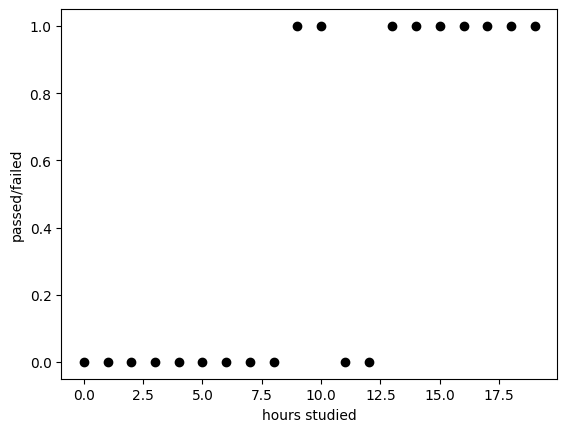

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
codecademyU = pd.read_csv('codecademyU.csv')

# Scatter plot of exam passage vs number of hours studied
plt.scatter(x = 'hours_studied', y = 'passed_exam', data = codecademyU, color='black')
plt.ylabel('passed/failed')
plt.xlabel('hours studied')

plt.show()

# Logistic Regression

We saw that predicted outcomes from a linear regression model range from negative to positive infinity. These predictions don’t really make sense for a classification problem. Step in logistic regression!

To build a logistic regression model, we apply a logit link function to the left-hand side of our linear regression function. Remember the equation for a linear model looks like this:

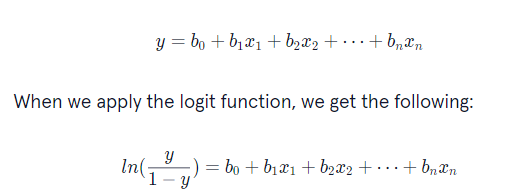

For the Codecademy University example, this means that we are fitting the curve shown below to our data — instead of a line, like in linear regression:

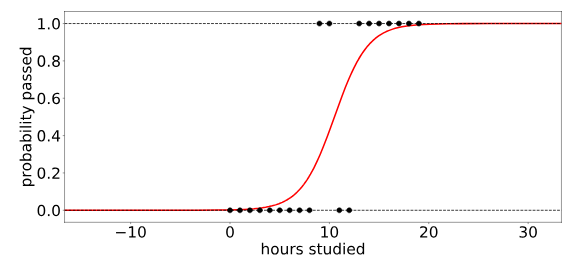

Notice that the red line stays between 0 and 1 on the y-axis. It now makes sense to interpret this value as a probability of group membership; whereas that would have been non-sensical for regular linear regression.

Note that this is a pretty nifty trick for adapting a linear regression model to solve classification problems! There are actually many other kinds of link functions that we can use for different adaptations.

d:\Documentos\Codecademy\MachineLearningEngineer\MLEngineerCourse.env\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Documentos\Codecademy\MachineLearningEngineer\MLEngineerCourse.env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


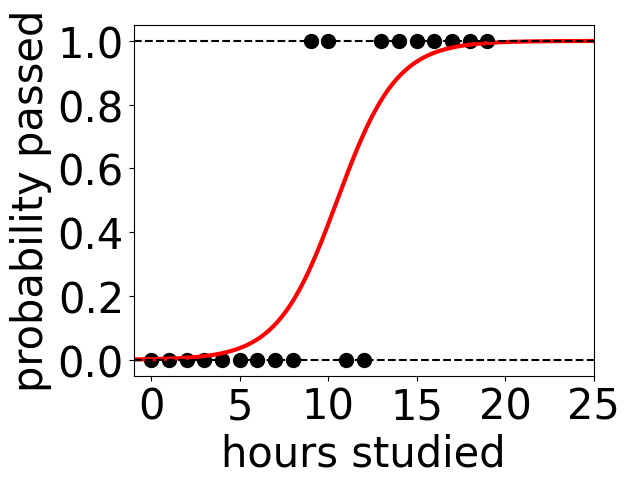

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
codecademyU = pd.read_csv('codecademyU.csv')

# Define five_hour_studier below

# Fit the logistic regression model
hours_studied = codecademyU[['hours_studied']]
passed_exam = codecademyU[['passed_exam']]
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(hours_studied,passed_exam)

# Plug sample data into fitted model
sample_x = np.linspace(-16.65, 33.35, 300).reshape(-1,1)
probability = model.predict_proba(sample_x)[:,1]

# Plot exam data
plt.scatter(hours_studied, passed_exam, color='black', s=100)

# Plot logistic curve
plt.plot(sample_x, probability, color='red', linewidth=3)

# Customization for readability
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.axhline(y=0, color='k', linestyle='--')
plt.axhline(y=1, color='k', linestyle='--')

# Label plot and set limits
plt.ylabel('probability passed', fontsize = 30)
plt.xlabel('hours studied', fontsize = 30)
plt.xlim(-1, 25)
plt.tight_layout()

# Show the plot
plt.show()
five_hour_studier = 0

## Log-Odds

So far, we’ve learned that the equation for a logistic regression model looks like this:

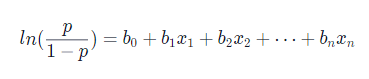

Note that we’ve replaced y with the letter p because we are going to interpret it as a probability (eg., the probability of a student passing the exam). The whole left-hand side of this equation is called log-odds because it is the natural logarithm (ln) of odds (p/(1-p)). The right-hand side of this equation looks exactly like regular linear regression!

In order to understand how this link function works, let’s dig into the interpretation of log-odds a little more. The odds of an event occurring is:

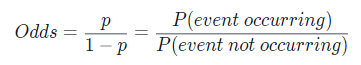

For example, suppose that the probability a student passes an exam is 0.7. That means the probability of failing is 1 - 0.7 = 0.3. Thus, the odds of passing are:

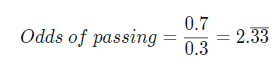

This means that students are 2.33 times more likely to pass than to fail.

Odds can only be a positive number. When we take the natural log of odds (the log odds), we transform the odds from a positive value to a number between negative and positive infinity — which is exactly what we need! The logit function (log odds) transforms a probability (which is a number between 0 and 1) into a continuous value that can be positive or negative.

In [3]:
import numpy as np
from exam import hours_studied, calculated_coefficients, intercept

# Calculate odds_of_rain

odds_of_rain = 0.4 / (1-0.4)

# Calculate log_odds_of_rain

log_odds_of_rain = np.log(odds_of_rain)

# Calculate odds_on_time
odds_on_time = 0.9 / (1-0.9)


# Calculate log_odds_on_time

log_odds_on_time = np.log(odds_on_time)

## Sigmoid Function

    hours_studied
0       -6.236653
1       -5.643001
2       -5.049350
3       -4.455698
4       -3.862046
5       -3.268395
6       -2.674743
7       -2.081092
8       -1.487440
9       -0.893788
10      -0.300137
11       0.293515
12       0.887166
13       1.480818
14       2.074470
15       2.668121
16       3.261773
17       3.855425
18       4.449076
19       5.042728
    hours_studied
0        0.001953
1        0.003530
2        0.006373
3        0.011479
4        0.020592
5        0.036671
6        0.064480
7        0.110948
8        0.184306
9        0.290329
10       0.425524
11       0.572856
12       0.708305
13       0.814696
14       0.888397
15       0.935119
16       0.963094
17       0.979274
18       0.988446
19       0.993585


d:\Documentos\Codecademy\MachineLearningEngineer\MLEngineerCourse.env\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


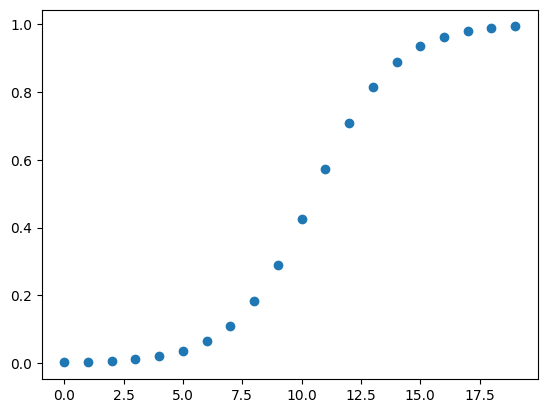

In [5]:
# Import libraries and data
import pandas as pd
import numpy as np
codecademyU = pd.read_csv('codecademyU.csv')

# Fit the logistic regression model
hours_studied = codecademyU[['hours_studied']]
passed_exam = codecademyU[['passed_exam']]
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(hours_studied,passed_exam)

# Save intercept and coef
intercept = model.intercept_
coef = model.coef_

# Calculate log_odds here
log_odds = intercept + coef * hours_studied
print(log_odds)

# Calculate pred_probability_passing here
pred_probability_passing = 1 / (1+np.exp(-log_odds))
print(pred_probability_passing)

plt.scatter(hours_studied, pred_probability_passing)
plt.show()

## Fitting a model in sklearn

Now that we’ve learned a little bit about how logistic regression works, let’s fit a model using sklearn.

To do this, we’ll begin by importing the LogisticRegression module and creating a LogisticRegression object:

After creating the object, we need to fit our model on the data. We can accomplish this using the .fit() method, which takes two parameters: a matrix of features and a matrix of class labels (the outcome we are trying to predict).

Now that the model is trained, we can access a few useful attributes:

* model.coef_ is a vector of the coefficients of each feature
* model.intercept_ is the intercept

The coefficients can be interpreted as follows:

* Large positive coefficient: a one unit increase in that feature is associated with a large increase in the log odds (and therefore probability) of a datapoint belonging to the positive class (the outcome group labeled as 1)
* Large negative coefficient: a one unit increase in that feature is associated with a large decrease in the log odds/probability of belonging to the positive class.
* Coefficient of 0: The feature is not associated with the outcome.

**One important note is that sklearn‘s logistic regression implementation requires the features to be standardized because regularization is implemented by default.**

In [9]:
# Import pandas and the data
import pandas as pd
codecademyU = pd.read_csv('codecademyU_2.csv')

# Separate out X and y
X = codecademyU[['hours_studied', 'practice_test']]
y = codecademyU.passed_exam

# Transform X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 27)

# Create and fit the logistic regression model here:
from sklearn.linear_model import LogisticRegression

cc_lr = LogisticRegression()

cc_lr.fit(X_train, y_train)

# Print the intercept and coefficients here:
print(cc_lr.intercept_)
print(cc_lr.coef_)




[-0.13173123]
[[1.5100409  0.12002228]]


## Predictions in sklearn

Using a trained model, we can predict whether new datapoints belong to the positive class (the group labeled as 1) using the .predict() method. The input is a matrix of features and the output is a vector of predicted labels, 1 or 0.

If we are more interested in the predicted probability of group membership, we can use the .predict_proba() method. The input to predict_proba() is also a matrix of features and the output is an array of probabilities, ranging from 0 to 1:

By default, .predict_proba() returns the probability of class membership for both possible groups. In the example code above, we’ve only printed out the probability of belonging to the positive class. Notice that datapoints with predicted probabilities greater than 0.5 (the second and third datapoints in this example) were classified as 1s by the .predict() method. This is a process known as thresholding. As we can see here, sklearn sets the default classification threshold probability as 0.5.

In [10]:
# Import pandas and the data
import pandas as pd
codecademyU = pd.read_csv('codecademyU_2.csv')

# Separate out X and y
X = codecademyU[['hours_studied', 'practice_test']]
y = codecademyU.passed_exam

# Transform X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 27)

# Create and fit the logistic regression model here:
from sklearn.linear_model import LogisticRegression
cc_lr = LogisticRegression()
cc_lr.fit(X_train,y_train)

# Print out the predicted outcomes for the test data
print(cc_lr.predict(X_test))
# Print out the predicted probabilities for the test data
print(cc_lr.predict_proba(X_test)[:,1])
# Print out the true outcomes for the test data
print(y_test)






[0 1 0 1 1]
[0.32065927 0.7931881  0.05547483 0.57747928 0.87070434]
7     0
15    1
0     0
11    0
17    1
Name: passed_exam, dtype: int64


## Classification Thresholding

As we’ve seen, logistic regression is used to predict the probability of group membership. Once we have this probability, we need to make a decision about what class a datapoint belongs to. This is where the classification threshold comes in!

The default threshold for sklearn is 0.5. If the predicted probability of an observation belonging to the positive class is greater than or equal to the threshold, 0.5, the datapoint is assigned to the positive class.

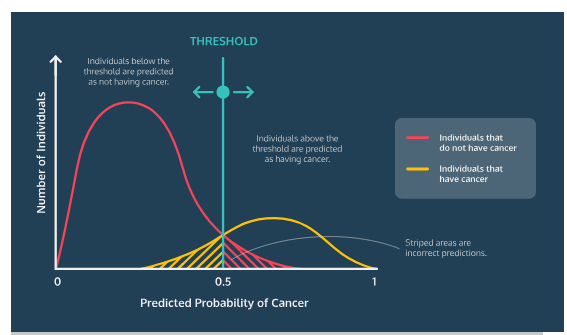

We can choose to change the threshold of classification based on the use-case of our model. For example, if we are creating a logistic regression model that classifies whether or not an individual has cancer, we may want to be more sensitive to the positive cases. We wouldn’t want to tell someone they don’t have cancer when they actually do!

In order to ensure that most patients with cancer are identified, we can move the classification threshold down to 0.3 or 0.4, increasing the sensitivity of our model to predicting a positive cancer classification. While this might result in more overall misclassifications, we are now missing fewer of the cases we are trying to detect: actual cancer patients.

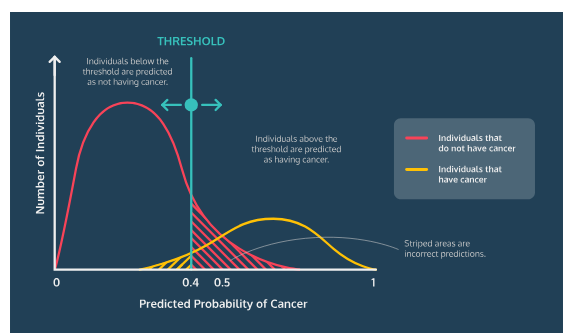

## Confusion matrix

When we fit a machine learning model, we need some way to evaluate it. Often, we do this by splitting our data into training and test datasets. We use the training data to fit the model; then we use the test set to see how well the model performs with new data.

As a first step, data scientists often look at a confusion matrix, which shows the number of true positives, false positives, true negatives, and false negatives.

- Column 1: Predicted As Negatives
- Column 2: Predicted As Positives

- Row 1: Real Negatives
- Row 2: Real Positives

In [11]:
# Import pandas and the data
import pandas as pd
codecademyU = pd.read_csv('codecademyU_2.csv')

# Separate out X and y
X = codecademyU[['hours_studied', 'practice_test']]
y = codecademyU.passed_exam

# Transform X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 27)

# Create and fit the logistic regression model here:
from sklearn.linear_model import LogisticRegression
cc_lr = LogisticRegression()
cc_lr.fit(X_train,y_train)

# Save and print the predicted outcomes
y_pred = cc_lr.predict(X_test)
print('predicted classes: ', y_pred)

# Print out the true outcomes for the test data
print('true classes: ', y_test)

# Print out the confusion matrix here
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))


predicted classes:  [0 1 0 1 1]
true classes:  7     0
15    1
0     0
11    0
17    1
Name: passed_exam, dtype: int64
[[2 1]
 [0 2]]


## Accuracy, Recall, Precision, F1 Score

In [12]:
# Import pandas and the data
import pandas as pd
codecademyU = pd.read_csv('codecademyU_2.csv')

# Separate out X and y
X = codecademyU[['hours_studied', 'practice_test']]
y = codecademyU.passed_exam

# Transform X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 51)

# Create and fit the logistic regression model here:
from sklearn.linear_model import LogisticRegression
cc_lr = LogisticRegression()
cc_lr.fit(X_train,y_train)

# Save and print the predicted outcomes
y_pred = cc_lr.predict(X_test)
print('predicted classes: ', y_pred)

# Print out the true outcomes for the test data
print('true classes: ', y_test)

# Print out the confusion matrix
from sklearn.metrics import confusion_matrix
print('confusion matrix: ')
print(confusion_matrix(y_test, y_pred))

# Print accuracy here:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

# Print F1 score here:
from sklearn.metrics import f1_score

print(f1_score(y_test, y_pred))







predicted classes:  [0 1 1 0 0]
true classes:  1     0
12    0
15    1
2     0
7     0
Name: passed_exam, dtype: int64
confusion matrix: 
[[3 1]
 [0 1]]
0.8
0.6666666666666666


## Review
Congratulations! You just learned how a logistic regression model works and how to fit one to a dataset. Here are some of the things you learned:

* Logistic regression is used to perform binary classification.
* Logistic regression is an extension of linear regression where we use a logit link function to fit a sigmoid curve to the data, rather than a line.
* We can use the coefficients from a logistic regression model to estimate the log odds that a datapoint belongs to the positive class. We can then transform the log odds into a probability.
* The coefficients of a logistic regression model can be used to estimate relative feature importance.
* A classification threshold is used to determine the probabilistic cutoff for where a data sample is classified as belonging to a positive or negative class. The default cutoff in sklearn is 0.5.
* We can evaluate a logistic regression model using a confusion matrix or summary statistics such as accuracy, precision, recall, and F1 score.